# Visualize a Decision Tree
*Paulo G. Martinez* Wed. June 3rd 2020

**context**
- Ok, now that I have some data with signal.
- let's model it with a decision tree
- and practice/get comfortable visualizing the tree

In [1]:
# imports

# for plotting
import matplotlib.pyplot as plt
# for os agnostic path handling
from pathlib import Path
# for dataframe manimupation
import pandas as pd
# import tree models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

**read in the data**

In [2]:
# declare the path to the data
file_path = '../data/example-web-session-data.csv'
# handle os differences in slashes
file_path = Path(file_path)

# read the data into a dataframe
web_sesh_df = pd.read_csv(file_path)
# display the head as a spot check
web_sesh_df.head()

,start_hour,weekday,chrome_browser,firefox_browser,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_DOWNLOAD
0,7.9,3,False,False,False,True,True,False,0
1,6.9,4,False,False,True,False,True,False,0
2,6.7,5,True,True,True,False,False,False,2
3,9.4,4,False,False,False,True,True,False,0
4,9.2,5,True,False,False,False,False,False,2


**model the data**

In [3]:
# instantiate a decision tree classifier
classifier = DecisionTreeClassifier(
    random_state = 0
)

# fit the model to the data
classifier.fit(
    # data without the target
    web_sesh_df.drop(columns = ['TARGET_DOWNLOAD']),
    # target labels/classes
    web_sesh_df['TARGET_DOWNLOAD']
)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**plot the decision tree**

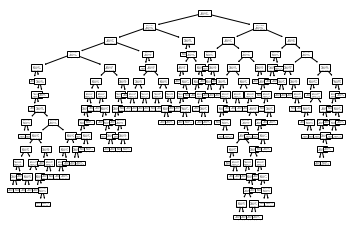

In [4]:
tree.plot_tree(classifier)
plt.show()

**Ok. That's not appreciable. Let's decrease the depth**

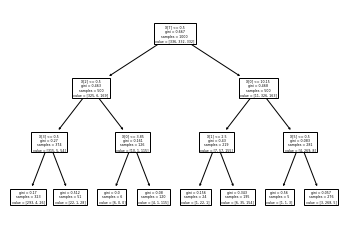

In [5]:
# instantiate a decision tree classifier
classifier = DecisionTreeClassifier(
    max_depth = 3,
    random_state = 0
)

# fit the model to the data
classifier.fit(
    # data without the target
    web_sesh_df.drop(columns = ['TARGET_DOWNLOAD']),
    # target labels/classes
    web_sesh_df['TARGET_DOWNLOAD']
)

tree.plot_tree(classifier)
plt.show()

**and let's improve the aesthetics**

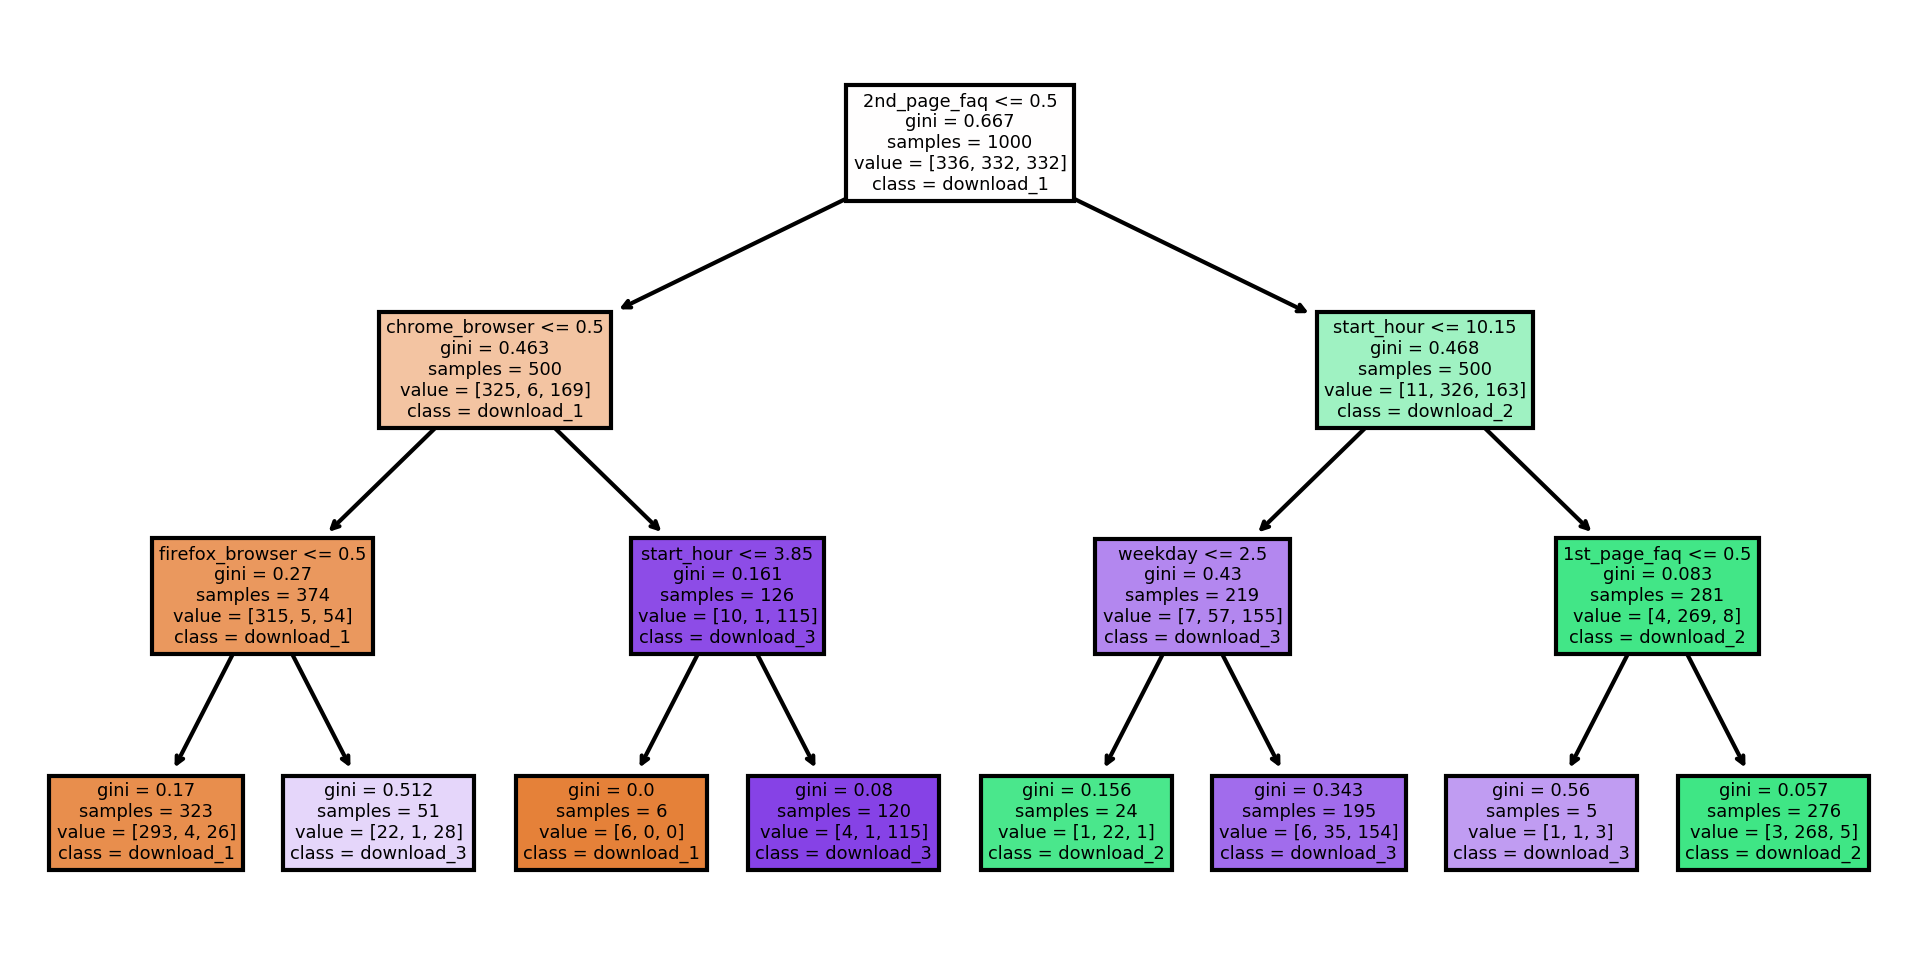

In [6]:
# define a figure and axes to plot in
fig, axes = plt.subplots(
    # one by one grid of subplots
    1,1,
    # size of the figure
    figsize = (8,4),
    # dots per inch
    dpi = 300
)

# plot the tree again
tree.plot_tree(
    # declare the tree to plot
    classifier,
    # feature names, are the column headers
    feature_names = web_sesh_df.drop(columns = ['TARGET_DOWNLOAD']).columns,
    # [class_1, class_2, ... class_n]
    class_names = [f"download_{n+1}" for n in range(len(web_sesh_df['TARGET_DOWNLOAD'].unique()))],
    # fill in the nodes
    filled = True
)
plt.show()

**Ok. That Looks like a great start**
- I love that the color transparency correlates to the purity of the predictions

**Let's simplify the viz even further for non-technical audiences**

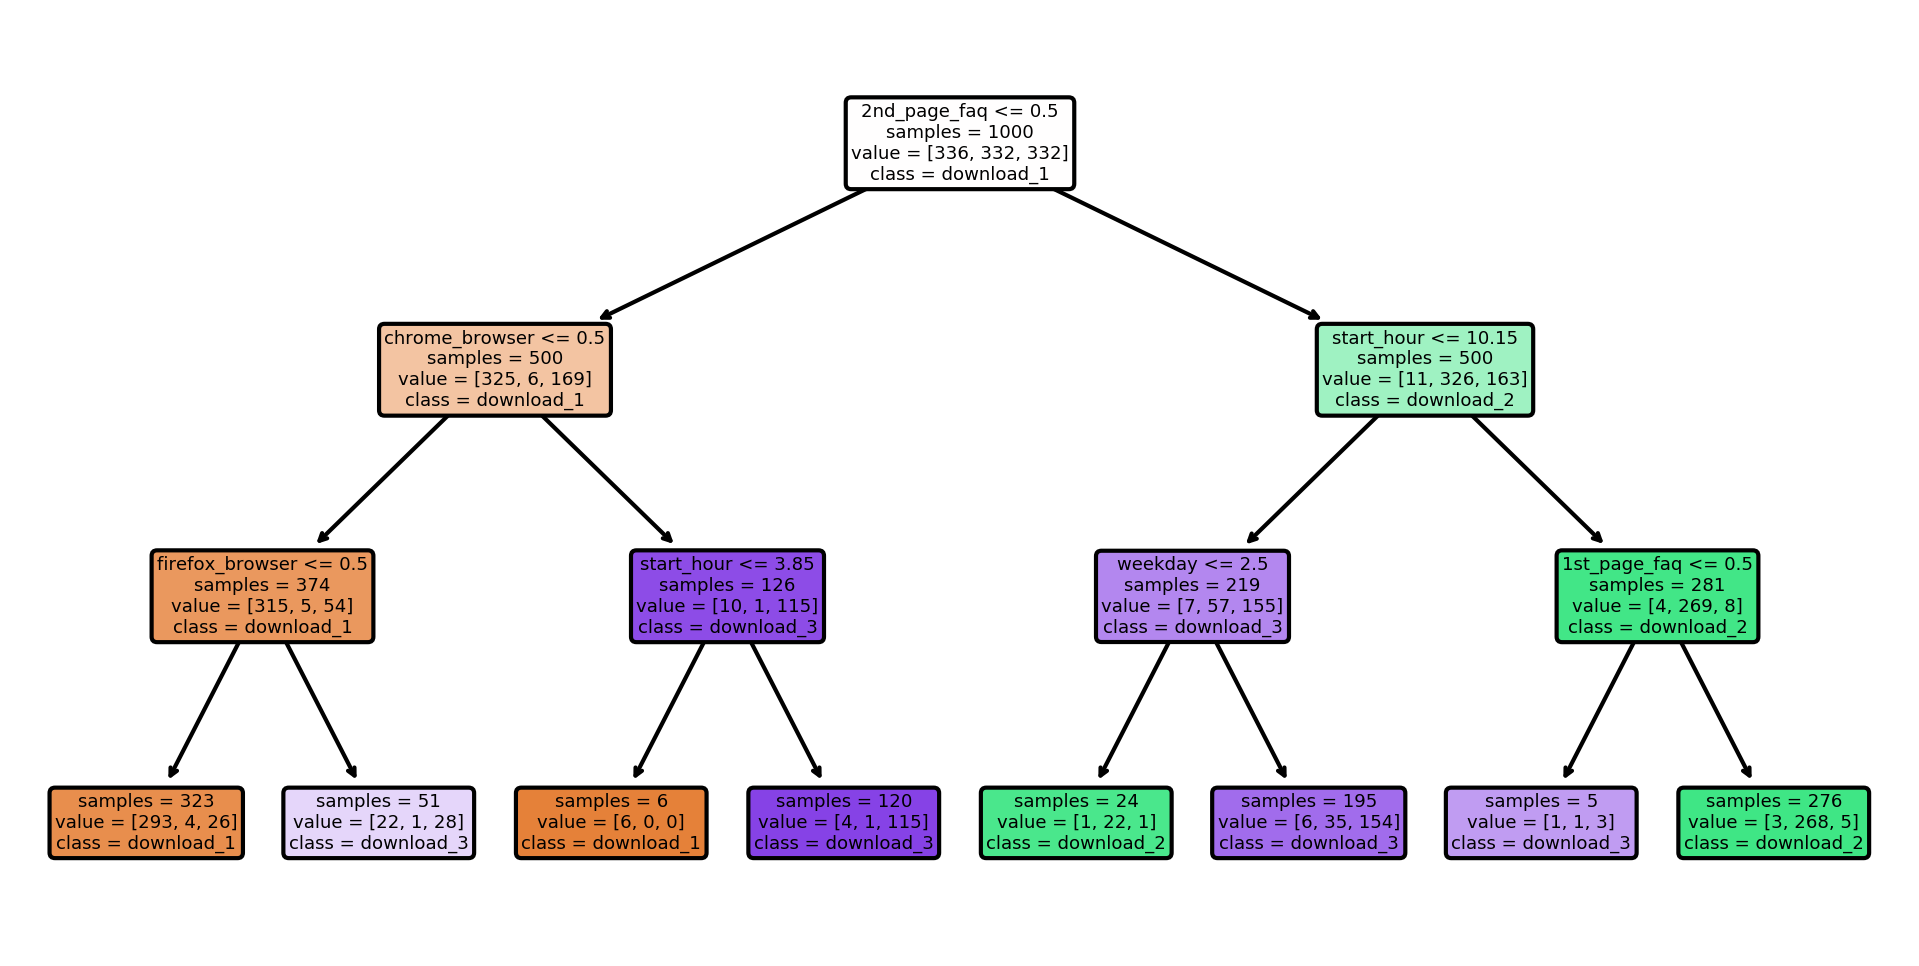

In [7]:
# define a figure and axes to plot in
fig, axes = plt.subplots(
    # one by one grid of subplots
    1,1,
    # size of the figure
    figsize = (8,4),
    # dots per inch
    dpi = 300
)

# plot the tree again
tree.plot_tree(
    # declare the tree to plot
    classifier,
    # feature names, are the column headers
    feature_names = web_sesh_df.drop(columns = ['TARGET_DOWNLOAD']).columns,
    # [class_1, class_2, ... class_n]
    class_names = [f"download_{n+1}" for n in range(len(web_sesh_df['TARGET_DOWNLOAD'].unique()))],
    # fill in the nodes
    filled = True,
    # turn the gini impurity label off
    impurity = False,
    # turn 'samples' and 'values' into proportions
    proportion = False,
    # round the corners on the nodes
    rounded = True,
    # round values to only two decimals
    precision = 2,
)
plt.show()